# Evaluating Algorithmic Strategy Performance

In this activity, you will be utilizing the performance metrics you've learned in order to analyze the benefits and tradeoffs of various algorithmic strategy investments.

## Instructions

#### Read in the Data
* Using the Jupyter notebook included in the unsolved folder, import the [data on daily returns to various algorithmic strategies.](../Resources/algo_returns.csv)

* This starter code reads in the following datasets:
  * `option_algos.csv`: Daily returns to an algorithmic option strategy on three stocks.
  * `option_trades.csv`: The number of trades each day for the three option strategies.
  * `equity_algos.csv`: Daily returns to an algorithmic equity strategy on three stocks.
  * `equity_trades.csv`: The number of trades each day for the three equity strategies.

#### Plotting Performance

* Plot non-compounded returns (`cumsum`) to the three option strategies.

* Plot compounded returns (1+`cumprod`) to the three equity strategies.

#### Adding Transaction Costs

* Create a variable called `cost_per_trade`, setting it at 0.001 (0.10% per trade).

* Using the `equity_trades` DataFrame, calculate the daily trade costs for each equity in the `equity_trades` DataFrame.

* Create a new DataFrame called `equity_returns_after_cost`, which subtracts daily trade costs from the `equity_returns` DataFrame.

* Then, create a new variable called `cost_per_trade`, this time setting it at 0.005 (0.50% per trade). Similarly, create a `option_returns_after_cost` DataFrame, which takes the daily option returns, and subtracts out daily `cost_per_trade` for the options.

#### Plot Performance After Transaction Costs

* Using 1+`cumprod`, calculate and plot cumulative performance of the `equity_returns_after_cost`.

* Using `cumsum`, calculate the total performance of the option returns `option_returns_after_cost`.

#### Calculate Sharpe Ratios

* Using the returns **after transaction costs**, calculate the Sharpe Ratio for each strategy
  * Calculate the Sharpe Ratios for both equity and option strategies.

#### Calculate Weekly Returns

* Use groupby on the equity returns (after transaction costs) and calculate total (`sum`) weekly returns. Use `describe` to display the best and worst weeks for trading.

* Do the same groupby approach, this time looking at weekly option trading returns.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from pathlib import Path

# Setting these options will allow for reviewing more of the DataFrames
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 300)

## Read in and Visualize the Data

In [2]:
# Read CSV file from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
option_returns = pd.read_csv(
    Path("../Resources/option_algos.csv"),
    index_col = "date", 
    parse_dates = True, 
    infer_datetime_format = True
)

# Review the DataFrame
option_returns.head()

/var/folders/h0/ckkxq40s70vc524w2v0_myw00000gp/T/ipykernel_6633/2939533457.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  option_returns = pd.read_csv(


,ANTM,SPY,EWJ
date,,,
2014-01-02,-0.045557,0.027186,0.118055
2014-01-03,-0.009778,-0.023939,-0.082041
2014-01-06,-0.026384,-0.027252,0.047106
2014-01-07,0.003609,0.123126,-0.051264
2014-01-08,0.016776,-0.053629,-0.024076


In [3]:
# Read CSV file from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
option_trades = pd.read_csv(
    Path("../Resources/option_trades.csv"),
    index_col = "date", 
    parse_dates = True, 
    infer_datetime_format = True
)

# Review the DataFrame
option_trades.head()

/var/folders/h0/ckkxq40s70vc524w2v0_myw00000gp/T/ipykernel_6633/3858157860.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  option_trades = pd.read_csv(


,ANTM,SPY,EWJ
date,,,
2014-01-02,0.0,0.0,0.0
2014-01-03,0.0,0.0,0.0
2014-01-06,0.0,0.0,0.0
2014-01-07,0.0,0.0,0.0
2014-01-08,0.0,2.0,0.0


In [4]:
# Read CSV file from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
equity_returns = pd.read_csv(
    Path("../Resources/equity_algos.csv"),
    index_col = "date", 
    parse_dates = True, 
    infer_datetime_format = True
)

# Review the DataFrame
equity_returns.head()

/var/folders/h0/ckkxq40s70vc524w2v0_myw00000gp/T/ipykernel_6633/2306776167.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  equity_returns = pd.read_csv(


,ANTM,SPY,EWJ
date,,,
2014-01-02,-0.011942,-0.005984,-0.011659
2014-01-03,0.004855,0.000461,0.000584
2014-01-06,0.008953,0.002594,0.002586
2014-01-07,-0.011833,-0.004394,-0.004182
2014-01-08,-0.008566,-0.000095,-0.002623


In [5]:
# Read CSV file from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
equity_trades = pd.read_csv(
    Path("../Resources/equity_trades.csv"),
    index_col = "date", 
    parse_dates = True, 
    infer_datetime_format = True
)

# Review the DataFrame
equity_trades.head()

/var/folders/h0/ckkxq40s70vc524w2v0_myw00000gp/T/ipykernel_6633/2549811954.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  equity_trades = pd.read_csv(


,ANTM,SPY,EWJ
date,,,
2014-01-02,1,1.0,1
2014-01-03,0,0.0,0
2014-01-06,0,0.0,0
2014-01-07,0,1.0,0
2014-01-08,1,0.0,1


### Plotting Performance

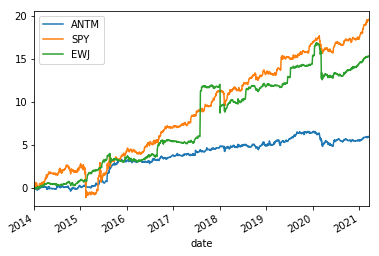

In [6]:
# Plot non-compounded returns (`cumsum`) to the three option strategies.
(option_returns).cumsum().plot()

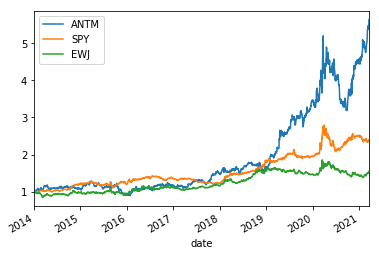

In [7]:
# Plot compounded returns (1+`cumprod`) to the three equity strategies.
(1+equity_returns).cumprod().plot()

### Adding Transaction Costs

In [12]:
# Calculate after transaction cost equity returns
cost_per_trade = 0.001
daily_trade_costs_equity = equity_trades * cost_per_trade
daily_trade_costs_equity.head(2)

,ANTM,SPY,EWJ
date,,,
2014-01-02,0.001,0.001,0.001
2014-01-03,0.000,0.000,0.000


In [13]:
# Calculate after transaction cost equity returns
equity_returns_after_cost = equity_returns - daily_trade_costs_equity
equity_returns_after_cost.head()

,ANTM,SPY,EWJ
date,,,
2014-01-02,-0.012942,-0.006984,-0.012659
2014-01-03,0.004855,0.000461,0.000584
2014-01-06,0.008953,0.002594,0.002586
2014-01-07,-0.011833,-0.005394,-0.004182
2014-01-08,-0.009566,-0.000095,-0.003623


In [14]:
# Calculate after transaction cost option returns
cost_per_trade = 0.005
daily_trade_costs_options = option_trades * cost_per_trade
daily_trade_costs_options.tail(6)

,ANTM,SPY,EWJ
date,,,
2021-03-11,0.01,0.01,0.01
2021-03-12,0.00,0.00,0.00
2021-03-15,0.00,0.00,0.00
2021-03-16,0.00,0.00,0.00
2021-03-17,0.00,0.00,0.00
2021-03-18,0.00,0.00,0.00


In [15]:
# Calculate after transaction cost option returns
option_returns_after_cost = option_returns - daily_trade_costs_options
option_returns_after_cost.head()

,ANTM,SPY,EWJ
date,,,
2014-01-02,-0.045557,0.027186,0.118055
2014-01-03,-0.009778,-0.023939,-0.082041
2014-01-06,-0.026384,-0.027252,0.047106
2014-01-07,0.003609,0.123126,-0.051264
2014-01-08,0.016776,-0.063629,-0.024076


### Plot Performance After Transaction Costs

<Axes: xlabel='date'>

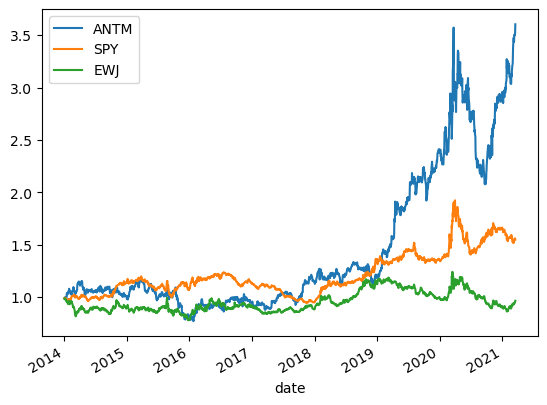

In [16]:
# Plot cumulative performance of after costs equity returns
(1+equity_returns_after_cost).cumprod().plot()

<Axes: xlabel='date'>

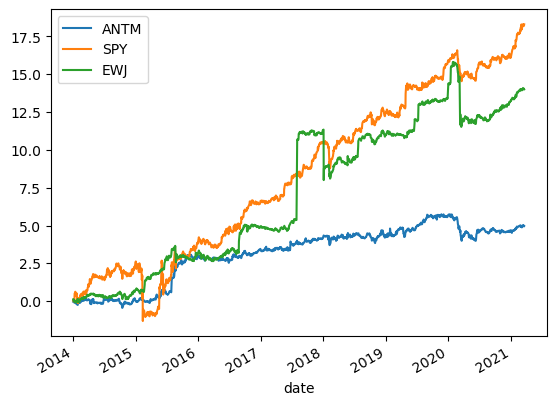

In [18]:
# Plot total performance of the option returns
(option_returns_after_cost).cumsum().plot()

### Calculate Sharpe Ratios

Using the returns **after transaction costs**, calculate the Sharpe Ratio for each strategy.

Calculate the Sharpes for both equity and option strategies. 

In [14]:
# Calculate Sharpe Ratio for the equity algos
annualized_return = equity_returns_after_cost.mean() * 252 
annualized_std = equity_returns_after_cost.std() * np.sqrt(252)
annualized_return/annualized_std

ANTM    0.802410
SPY     0.487163
EWJ     0.052008
dtype: float64

In [15]:
# Calculate Sharpe Ratio for the option algos
annualized_return = option_returns_after_cost.mean() * 252 
annualized_std = option_returns_after_cost.std() * np.sqrt(252)
annualized_return/annualized_std

ANTM    0.686211
SPY     1.146813
EWJ     0.715246
dtype: float64

### Calculate Weekly Returns

In [16]:
# Calculate weekly returns for the equity strategies using groupby
weekly_returns = equity_returns_after_cost.groupby(
    by=[
        equity_returns_after_cost.index.year,
        equity_returns_after_cost.index.week
    ]
).sum()
weekly_returns.head(2)

ANTM       SPY       EWJ
date date                              
2014 1    -0.025079 -0.005685 -0.013152
     2    -0.009608 -0.001933 -0.016878

In [17]:
# Use `describe` to calculate best (max) and worst (min) case equity returns
weekly_returns.describe()

,ANTM,SPY,EWJ
count,377.000000,377.000000,377.000000
mean,0.004072,0.001369,0.000162
std,0.035829,0.020915,0.022461
min,-0.107364,-0.083146,-0.083029
25%,-0.013886,-0.009199,-0.013224
50%,0.001854,0.000059,-0.001190
75%,0.021308,0.011252,0.011057
max,0.241821,0.135955,0.136079


In [18]:
# Calculate weekly returns for the option strategies using groupby
weekly_returns = option_returns_after_cost.groupby(
    by=[
        option_returns_after_cost.index.year,
        option_returns_after_cost.index.week
    ]
).sum()
weekly_returns.head(2)

ANTM       SPY       EWJ
date date                              
2014 1    -0.216612  0.257953  0.174084
     2    -0.017401  0.505180 -0.079912

In [19]:
# Use `describe` to calculate best (max) and worst (min) case option returns
weekly_returns.describe()

,ANTM,SPY,EWJ
count,377.000000,377.000000,377.000000
mean,0.013165,0.048547,0.037144
std,0.142475,0.258415,0.382340
min,-0.682878,-1.922320,-2.799901
25%,-0.051293,-0.079494,-0.045421
50%,0.010344,0.046353,0.021978
75%,0.072856,0.164915,0.091215
max,0.917726,1.473292,5.295924
